In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Previous year

In [227]:
def calc_treasure(mult, hunt, perc):
    return mult * 7500 / (hunt + perc)

In [228]:
mult = np.array(
    [[24, 70, 41, 21, 60],
    [47, 82, 87, 80, 35],
    [73, 89, 100, 90, 17],
    [77, 83, 85, 79, 55],
    [12, 27, 52, 15, 30]]
)
hunt = np.array(
    [[2, 4, 3, 2, 4],
    [3, 5, 5, 5, 3],
    [4, 5, 8, 7, 2],
    [5, 5, 5, 5, 4],
    [2, 3, 4, 2, 3]]
)

In [229]:
x = 0.59
percs = np.array(
    [[1.52, 8.17, 1.89, x, 3.65],
    [3.02, 6.2, 9.84, 4.15, 1.15],
    [11.31, 10.76, 4.93, 3.43, 0.61],
    [4.56, 5.45, 6.55, 5.45, 2.45],
    [x, x, 1.94, x, x]]
)

In [230]:
treasures = []
for m, h, p in zip(mult.flatten(), hunt.flatten(), percs.flatten()):
    treasure = calc_treasure(m, h, p)
    treasures.append(treasure)

In [231]:
df = pd.DataFrame(data=np.array([mult.flatten(), hunt.flatten(), percs.flatten(), treasures]).T, columns=['mult', 'hunt', 'perc', 'tre'])
df = df.assign(tre_naive=lambda x: x['mult'] * 7500 / x['hunt'])

In [232]:
df_sorted = df.sort_values(by='tre_naive', ascending=False).reset_index(drop=True)

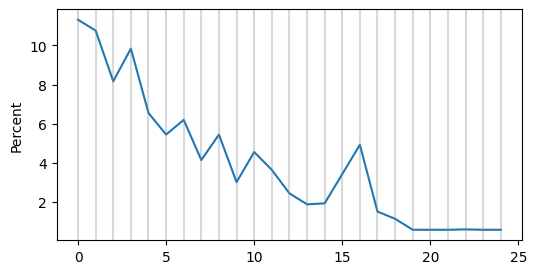

In [233]:
plt.figure(figsize=(6, 3))
plt.plot(df_sorted['perc'].to_numpy())
plt.ylabel('Percent')
for i in range(df_sorted.shape[0]):
    plt.axvline(i, c='gray', alpha=0.3)
plt.show()

In [234]:
(df_sorted.iloc[15:17]['perc'] - (df_sorted.iloc[14]['perc'] + df_sorted.iloc[17]['perc']) / 2) * 2.5

15    4.25
16    8.00
Name: perc, dtype: float64

# This year

- Your goal is to choose up to two containers.
- First one is free
- Second one has a fee of 50000 Sea Shells
- Each container is said to hold at least 10.000 SeaShells.

In [342]:
def calc_treasure(mult, hunt, perc):
    return mult * 10000 / (hunt + perc)

In [343]:
mult = np.array([10, 80, 37, 17, 90, 31, 50, 20, 73, 89])
hunt = np.array([1, 6, 3, 1, 10, 2, 4, 2, 4, 8])
fee = 50000

In [344]:
df = pd.DataFrame(data=np.array([mult.flatten(), hunt.flatten()]).T, columns=['mult', 'hunt'])

In [345]:
df = df.assign(tre_naive=lambda x: x['mult'] * 10000 / x['hunt'])

In [346]:
df_sorted = df.sort_values(by='tre_naive', ascending=False).reset_index(drop=True)

In [347]:
df_sorted

,mult,hunt,tre_naive
0,73,4,182500.000000
1,17,1,170000.000000
2,31,2,155000.000000
3,80,6,133333.333333
4,50,4,125000.000000
5,37,3,123333.333333
6,89,8,111250.000000
7,10,1,100000.000000
8,20,2,100000.000000
9,90,10,90000.000000


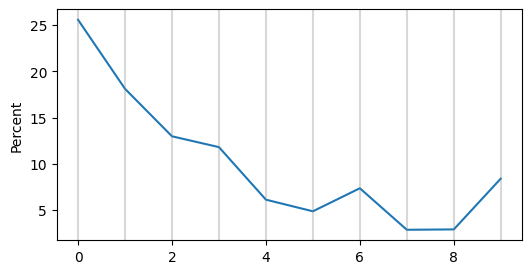

In [480]:
perc = np.arange(start=15, stop=5, step=-1) ** 4.5 / 6950
perc += np.random.randint(0, 3, 10)
perc = perc / perc.sum() * 88
perc[-1] += 8
perc[6] += 4
perc[3] += 1
perc[7] -= 0.35
perc[8] += 0.35

plt.figure(figsize=(6, 3))
plt.plot(perc)
plt.ylabel('Percent')
for i in range(10):
    plt.axvline(i, c='gray', alpha=0.3)
plt.show()

In [481]:
(perc[5] + perc[7]) / 2

np.float64(3.8621979442176615)

In [482]:
perc

array([25.59027337, 18.11810319, 12.98020806, 11.80631327,  6.12073605,
        4.86202817,  7.35704109,  2.86236772,  2.90278426,  8.40014482])

In [483]:
perc[0], perc[6], perc[8], perc[9]

(np.float64(25.590273366586995),
 np.float64(7.357041093178492),
 np.float64(2.9027842596640974),
 np.float64(8.400144816209203))

In [484]:
df_sorted = df_sorted.assign(perc=perc)

In [485]:
df_sorted = df_sorted.assign(tre=lambda x: calc_treasure(x['mult'], x['hunt'], x['perc']))

In [486]:
df_sorted

,mult,hunt,tre_naive,perc,tre
0,73,4,182500.000000,25.590273,24670.268874
1,17,1,170000.000000,18.118103,8892.095533
2,31,2,155000.000000,12.980208,20693.971594
3,80,6,133333.333333,11.806313,44927.885279
4,50,4,125000.000000,6.120736,49403.521388
5,37,3,123333.333333,4.862028,47061.647734
6,89,8,111250.000000,7.357041,57953.872403
7,10,1,100000.000000,2.862368,25890.854308
8,20,2,100000.000000,2.902784,40793.147201
9,90,10,90000.000000,8.400145,48912.658514


In [487]:
df_final = df_sorted.sort_values(by='tre', ascending=False)
df_final

,mult,hunt,tre_naive,perc,tre
6,89,8,111250.000000,7.357041,57953.872403
4,50,4,125000.000000,6.120736,49403.521388
9,90,10,90000.000000,8.400145,48912.658514
5,37,3,123333.333333,4.862028,47061.647734
3,80,6,133333.333333,11.806313,44927.885279
8,20,2,100000.000000,2.902784,40793.147201
7,10,1,100000.000000,2.862368,25890.854308
0,73,4,182500.000000,25.590273,24670.268874
2,31,2,155000.000000,12.980208,20693.971594
1,17,1,170000.000000,18.118103,8892.095533


In [492]:
print(f'Selected: {int(df_final.iloc[0]['mult'])}')
print(f'Profit: {int(df_final.iloc[0]['tre'])}')

Selected: 89
Profit: 57953


# Sensitivity analysis

In [450]:
selected = []
df_sum = pd.Series(data=np.zeros(10), index=df_final['mult'])
for _ in range(1000):
    mult = np.array([10, 80, 37, 17, 90, 31, 50, 20, 73, 89])
    hunt = np.array([1, 6, 3, 1, 10, 2, 4, 2, 4, 8])
    fee = 50000
    
    df = pd.DataFrame(data=np.array([mult.flatten(), hunt.flatten()]).T, columns=['mult', 'hunt'])
    df = df.assign(tre_naive=lambda x: x['mult'] * 10000 / x['hunt'])
    df_sorted = df.sort_values(by='tre_naive', ascending=False).reset_index(drop=True)
    
    perc = np.arange(start=15, stop=5, step=-1) ** 4.5 / 6950
    perc += np.random.randint(0, 4, 10)
    perc = perc / perc.sum() * 88
    perc[-1] += 8
    perc[6] += 4
    perc[3] += 1
    perc[7] -= 0.35
    perc[8] += 0.35
    
    # plt.figure(figsize=(6, 3))
    # plt.plot(perc)
    # plt.ylabel('Percent')
    # for i in range(10):
    # plt.axvline(i, c='gray', alpha=0.3)
    # plt.show()
    
    df_sorted = df_sorted.assign(perc=perc)
    df_sorted = df_sorted.assign(tre=lambda x: calc_treasure(x['mult'], x['hunt'], x['perc']))
    df_final = df_sorted.sort_values(by='tre', ascending=False)
    # print(df_final)

    df_sum = df_sum + df_final.set_index('mult', drop=True)['tre']
    selected.append(df_final.iloc[0]['mult'])
    selected.append(df_final.iloc[1]['mult'])

In [451]:
(df_sum / 1000).sort_values(ascending=False)

mult
89    57220.015731
20    48115.378370
80    47806.070171
37    46769.497800
90    46063.411690
50    45716.346777
10    33760.042103
73    25571.946524
31    20092.727954
17     8797.057521
dtype: float64

In [452]:
np.unique(selected, return_counts=True)

(array([10., 20., 37., 50., 80., 89., 90.]),
 array([ 44, 362, 243, 120, 201, 979,  51]))

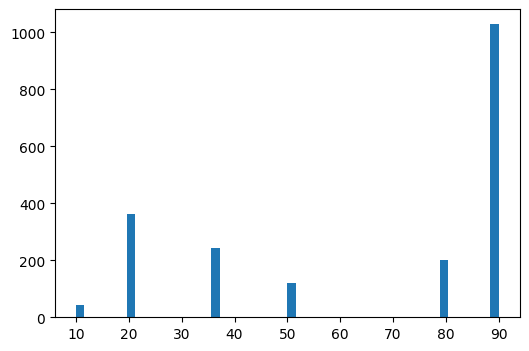

In [453]:
plt.figure(figsize=(6, 4))
plt.hist(selected, bins=50)
plt.show()

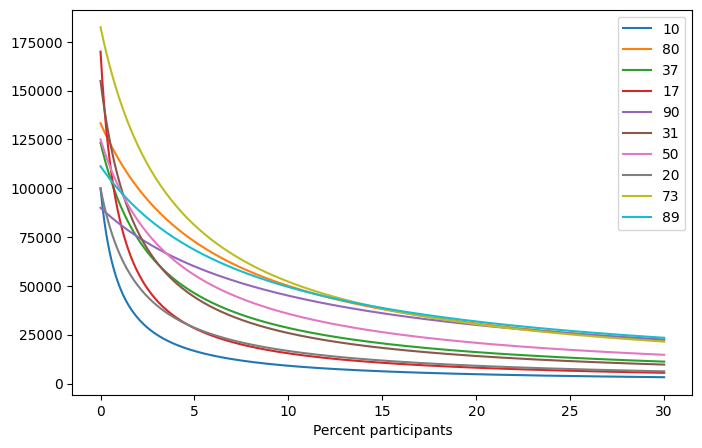

In [416]:
pct_range = np.arange(0, 30.1, 0.1)
treasure_list = []
for pct in pct_range:
    perc = np.ones(mult.shape) * pct
    treasure = calc_treasure(mult, hunt, perc)
    treasure_list.append(treasure.flatten())
cell_scores = []
for i in range(treasure_list[0].shape[0]):
    cell_scores.append([treasure[i] for treasure in treasure_list])
plt.figure(figsize=(8, 5))
for i, score in enumerate(cell_scores):
    plt.plot(pct_range, score, label=mult[i])
plt.xlabel('Percent participants')
plt.legend()
plt.show()